In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

C:\Users\heman\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 2

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage/Plant",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9634 files belonging to 11 classes.


In [5]:
dataset.class_names

['Apple__Apple_scab',
 'Apple__Black_rot',
 'Apple__Cedar_apple_rust',
 'Apple__healthy',
 'No_leaf',
 'Peach__Bacterial_spot',
 'Peach_healthy',
 'Pepper_bell_Bacterial_spot',
 'Pepper_bell_healthy',
 'Strawberry__Lead_scorch',
 'Strawberry__healthy']

In [6]:
len(dataset) # because 3026/32 = 95

302

(32, 256, 256, 3)
[ 2  7  5  9  0  1  4  5  4  9  7  3  9  5  6  0  9  0  9  5 10  3  8  7
  5  9  6  5 10  5  9  7]
[[[169. 164. 158.]
  [168. 163. 157.]
  [166. 161. 155.]
  ...
  [149. 146. 139.]
  [150. 147. 140.]
  [150. 147. 140.]]

 [[169. 164. 158.]
  [168. 163. 157.]
  [168. 163. 157.]
  ...
  [147. 144. 137.]
  [147. 144. 137.]
  [147. 144. 137.]]

 [[166. 161. 155.]
  [166. 161. 155.]
  [167. 162. 156.]
  ...
  [149. 146. 139.]
  [150. 147. 140.]
  [150. 147. 140.]]

 ...

 [[139. 136. 131.]
  [130. 127. 122.]
  [125. 122. 117.]
  ...
  [107. 105. 106.]
  [100.  98.  99.]
  [ 94.  92.  93.]]

 [[137. 134. 129.]
  [126. 123. 118.]
  [119. 116. 111.]
  ...
  [ 99.  97.  98.]
  [ 95.  93.  94.]
  [ 92.  90.  91.]]

 [[127. 124. 119.]
  [121. 118. 113.]
  [118. 115. 110.]
  ...
  [103. 101. 102.]
  [106. 104. 105.]
  [108. 106. 107.]]]


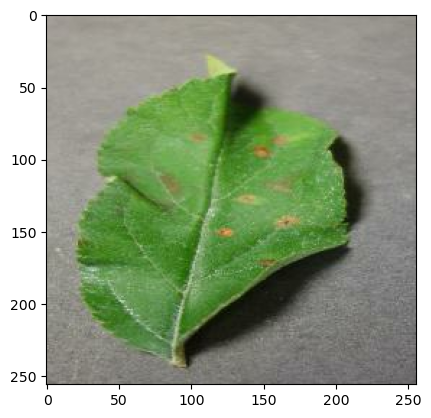

In [7]:
# converting elemnts from tensor to numpy
for i,j in dataset.take(1):
    print(i.shape)
    print(j.numpy())
    print(i[0].numpy())
    plt.imshow(i[0].numpy().astype("uint8"))

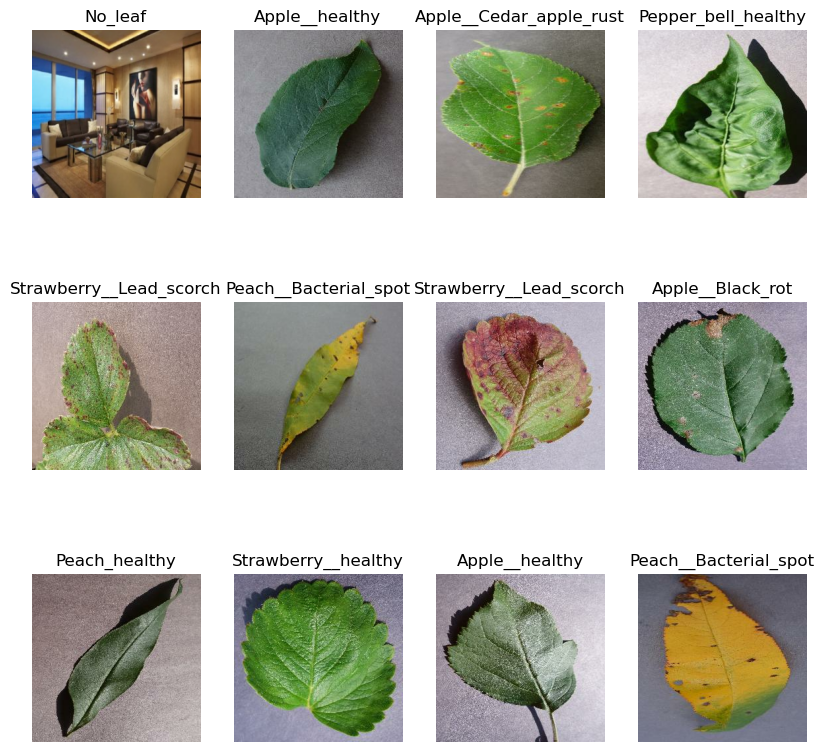

In [10]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[label_batch[i]])
        plt.axis("off")
        

In [19]:
# 80 % will be training 
# 20 % ==> 10 % validation  and 10 % testing 

In [20]:
dataset.take(10) # will have first 10 samples

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
train_size = 0.8
train_data = dataset.take(int(len(dataset)*train_size))

In [22]:
len(train_data)

236

In [23]:
remain_data = dataset.skip(int(len(dataset)*train_size))

In [24]:
len(remain_data)

59

In [25]:
val_size = 0.5
val_data = remain_data.take(int(len(remain_data)*val_size))
test_data = remain_data.skip(int(len(remain_data)*val_size))

In [26]:
len(val_data)

29

In [27]:
len(test_data)

30

In [4]:
# writting the function for splitting the data
def get_partition(ds,train_split= 0.8 ,val_split=0.1,test_split = 0.1 ,shuffle = True,shuffle_size = 10000):
    train_size = int(len(dataset)*train_split)
    val_size = int(len(dataset)*val_split)
    test_size = int(len(dataset)*test_split)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12) 
    train_data = ds.take(train_size)
    remain_data = ds.skip(train_size)
    val_data = remain_data.take(val_size)
    test_data = remain_data.skip(val_size)
    return train_data,val_data,test_data

In [5]:
train,val,test = get_partition(dataset)

In [6]:
len(train)

241

In [31]:
len(val)

29

In [32]:
len(test)

30

In [33]:
# train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [35]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
input=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

In [7]:
x = tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
x = tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=input),
x=tf.keras.layers.MaxPooling2D((2,2)),
x=tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
x=tf.keras.layers.MaxPooling2D((2,2)),
x=tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
x=tf.keras.layers.MaxPooling2D((2,2)),
x=tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
x=tf.keras.layers.MaxPooling2D((2,2)),
x=tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
x=tf.keras.layers.MaxPooling2D((2,2))
x=tf.keras.layers.Conv2D(64,(3,3),activation="relu")
x=tf.keras.layers.MaxPooling2D((2,2))
x=tf.keras.layers.Flatten()
x=tf.keras.layers.Dense(64,activation="relu")
x=tf.keras.layers.Dense(n_classes,activation="softmax")

TypeError: 'method' object is not iterable

In [40]:
model.build(input_shape = input)

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
with tf.device('/device:GPU:0'):
    model.fit(
        train,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        verbose = 1,
        validation_data = val
    )

Epoch 1/2
236/236 [==============================] - 169s 530ms/step - loss: nan - accuracy: 0.0642 - val_loss: nan - val_accuracy: 0.0690
Epoch 2/2
236/236 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0666

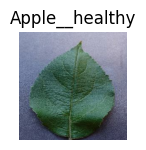

In [209]:
for image_batch,label_batch in test.take(1):
    arr = image_batch.numpy()
    for i in range(1):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[label_batch[i]])
        plt.axis("off")

In [210]:
ar1 = model.predict(arr)[1]

1/1 [==============================] - 0s 269ms/step


In [1]:
import tensorflow as tf

In [9]:
model = tf.saved_model.load ("../leaf disease prediction/Models/1")